Import necessary modules for Prophet analysis

In [1]:
from pandas_datareader import data as pandas_datareader
import pandas as pd 
from datetime import date
from nsepy import get_history
import pandas_profiling as pp


Load the data for index in Index_data variable for the time period starting from 2015 to T-1 .Please refer Nsepy documentation for ticker information and get_history method

In [14]:
index_data = get_history("NIFTY",start=date(2015,1,1,),end=date.today(),index=True)

In [19]:
index_data.head()
index_data = index_data.reset_index()

In [20]:
index_data.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Turnover    float64
dtype: object

Covert Date in the Data to Datetime64. y variable would be closing price of the stock or index

In [21]:
data = pd.DataFrame(index_data)
data['Date']=pd.to_datetime(data['Date'])
data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Turnover           float64
dtype: object

In [22]:
pp.ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


In [4]:
from fbprophet import Prophet


In [27]:
df = pd.DataFrame()
df['ds'] = data['Date']
df['y'] =data['Close']

In [28]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [54]:
m = Prophet(growth='linear',seasonality_mode="multiplicative",changepoint_prior_scle=30,seasonality_prior_scale=35,holiday_prior_scale=20,daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False)

NameError: name 'holidays' is not defined

In [ ]:
m.fit(df)

In [42]:
future = m.make_future_dataframe(periods=22)

In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat   yhat_lower    yhat_upper
1381 2020-07-27  10256.231597  9666.070650  10887.525862
1382 2020-07-28  10242.907517  9629.100621  10846.134765
1383 2020-07-29  10231.524190  9622.828228  10797.447487
1384 2020-07-30  10245.454617  9660.175539  10856.067376
1385 2020-07-31  10236.651023  9659.314531  10821.192234

In [44]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

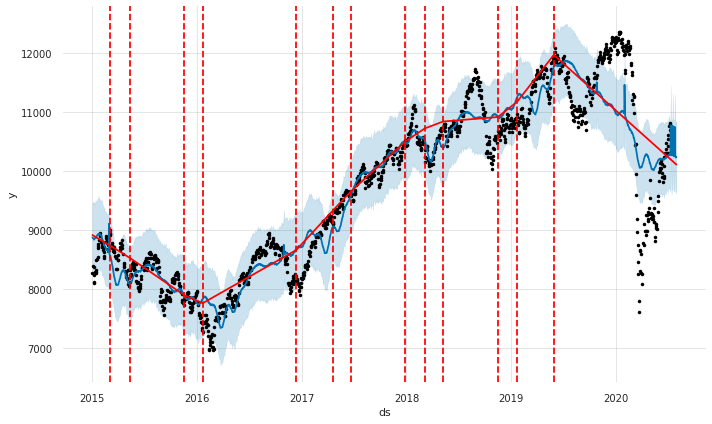

In [45]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


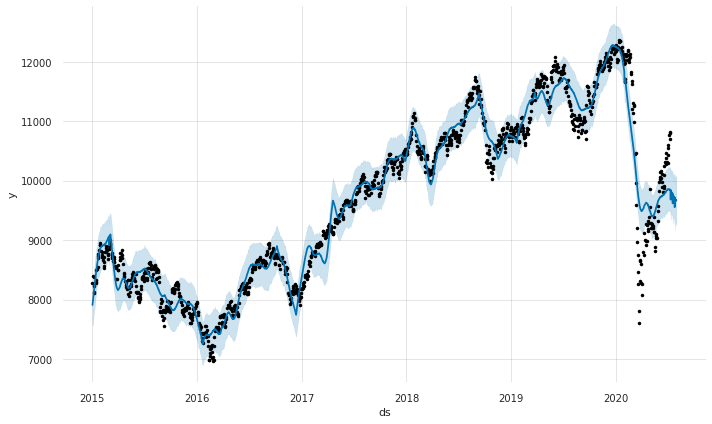

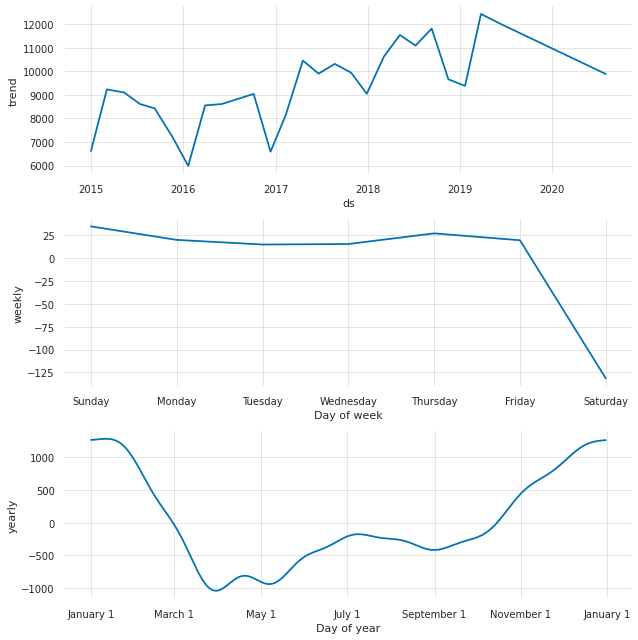

In [46]:
m = Prophet(changepoint_prior_scale=0.95)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
fig1 = m.plot_components(forecast)